In [8]:
"""
ned-result folder come from visually inspect individual object and wrote down the property for each one of them
(NED and SDSS database)
"""

'\nned-result folder come from visually inspect individual object and wrote down the property for each one of them\n(NED and SDSS database)\n'

In [2]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib import cm
import matplotlib

import pandas as pd
import numpy as np
import csv
import sys

from astropy.io import ascii
import mpld3
from mpld3 import plugins, utils

#my own library for deg_hr, hr_deg
from ch_py import *

%matplotlib inline
pylab.rcParams['figure.figsize'] = 8, 7
#mpld3.enable_notebook()
#mpld3.disable_notebook()

In [3]:
#function to remove all non-numbers characters into Nan
def func(x):
    try:
        return float(x)
    except ValueError:
        return -1.

In [4]:
df = pd.read_csv('/Users/taweewat/Documents/xray_project/result/cut-01.csv',\
                    keep_default_na=False, na_values=[""])
print df.shape, df.dropna().shape

(561, 52) (510, 52)


In [5]:
header_row=['index','ind','RA0','DEC0', 'SDSS','type','redshift','sep','reject','followup']
data = pd.read_csv('/Users/taweewat/Documents/xray_project/ned-result/copy-560-v2.csv',\
                   names=header_row, skiprows=1,keep_default_na=False, na_values=[""])

data["redshift"]=data["redshift"].apply(func)
#cut table
cut=pd.concat([df, data], axis=1)

In [16]:
cut

,ra,dec,xc,exc,hr1,ehr1,hr2,ehr2,dec_radio,df_radio,...,RA0,DEC0,SDSS,type,redshift,sep,reject,followup,SDSSc,rejectc
0,133.04916,76.45306,0.03920,0.011130,0.21,0.26,0.00,0.33,76.455056,6.5,...,133.049330,76.454058,n,g,1.127000,NaN,hz,outSD/outside,1,1
1,34.37958,73.82569,0.03880,0.008869,1.00,0.21,0.60,0.16,73.825639,68.1,...,34.379123,73.825664,rg,qso,2.367000,NaN,hz,inSD/outside,2,1
2,137.11916,72.27611,0.03119,0.010460,0.13,0.35,0.31,0.39,72.274694,9.5,...,137.121913,72.275402,n,uv/ radio,-1.000000,NaN,n,follow,1,2
3,156.65541,70.54361,0.03453,0.012260,0.01,0.36,-0.79,0.78,70.545333,4.1,...,156.653913,70.544472,n,uv/ radio,-1.000000,NaN,n,follow,1,2
4,114.08708,65.22320,0.02377,0.010900,0.69,0.35,0.93,1.13,65.220833,3.0,...,114.088957,65.222017,q,qso,3.035000,NaN,hz,inSD/outside,3,1
5,145.94792,69.14014,0.02033,0.010390,1.00,0.71,0.52,0.82,69.136667,0.5,...,145.946022,69.138403,q,qso,1.598000,NaN,hz,inSD/outside,3,1
6,175.36624,65.61042,0.03688,0.014920,-0.04,0.36,0.31,0.46,65.606139,17.5,...,175.363828,65.608279,q,g,0.805000,NaN,hz,inSD/outside,3,1
7,263.22708,65.55666,0.03448,0.003481,0.78,0.08,0.09,0.09,65.557333,25.0,...,263.227144,65.556997,q,s/ qso,0.885000,NaN,hz,inSD/outside,3,1
8,101.25667,60.41708,0.03999,0.013210,1.00,0.28,-0.10,0.35,60.411778,17.6,...,101.256189,60.414429,n,qso,0.831900,NaN,hz,outSD/outside,1,1
9,193.88333,59.66583,0.02586,0.009629,0.45,0.41,0.08,0.40,59.667000,0.4,...,193.882582,59.666415,q,qso/ uv/ x,1.330388,NaN,hz,inSD/outside,3,1


/Users/taweewat/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/taweewat/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/taweewat/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/taweewat/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


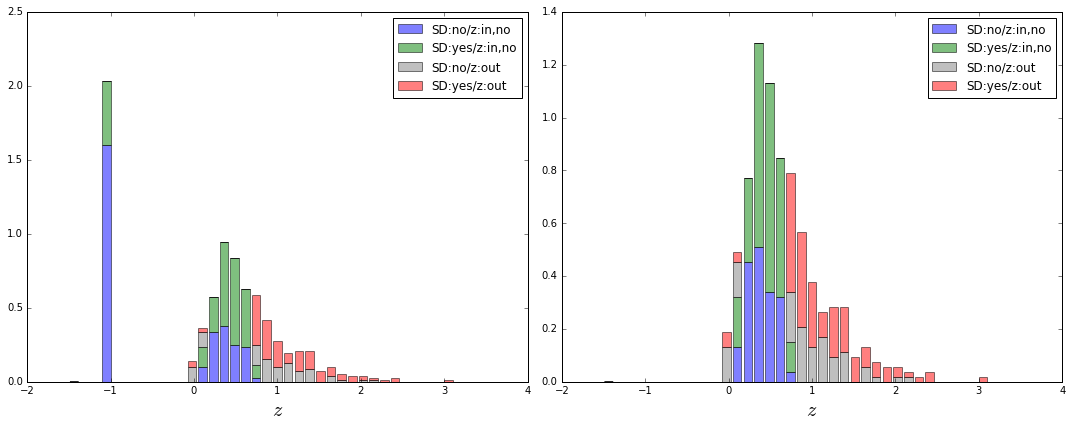

In [9]:
#plt.scatter(cut['redshift'].values,cut['xray'].values)
#mpld3.disable_notebook()
bins = np.linspace(-1.5, 3.5, 40)
fig, ax = plt.subplots(1, 2, figsize=(15,6))
q1=cut[cut['followup']=='follow']['redshift'].dropna().values
q2=cut[cut['followup']=='followed']['redshift'].dropna().values
q3=cut[cut['followup']=='outSD/outside']['redshift'].dropna().values
q4=cut[cut['followup']=='inSD/outside']['redshift'].dropna().values

ax[0].hist([q1,q2,q3,q4], bins=bins, stacked=True, normed = True, alpha=0.5, color=['blue','green','grey','red'],\
          label=['SD:no/z:in,no','SD:yes/z:in,no','SD:no/z:out','SD:yes/z:out'])
ax[0].set_xlabel(r'$z$', size=20.)
ax[0].legend(loc='best')

a1=cut.loc[cut['redshift']>-0.5,:][cut['followup']=='follow']['redshift'].dropna().values
a2=cut.loc[cut['redshift']>-0.5,:][cut['followup']=='followed']['redshift'].dropna().values
a3=cut.loc[cut['redshift']>-0.5,:][cut['followup']=='outSD/outside']['redshift'].dropna().values
a4=cut.loc[cut['redshift']>-0.5,:][cut['followup']=='inSD/outside']['redshift'].dropna().values
ax[1].hist([a1,a2,a3,a4], bins=bins, stacked=True, normed = True, alpha=0.5, color=['blue','green','grey','red'],\
          label=['SD:no/z:in,no','SD:yes/z:in,no','SD:no/z:out','SD:yes/z:out'])
ax[1].set_xlabel(r'$z$', size=20.)

ax[1].legend(loc='best')

plt.tight_layout()


In [10]:
#abell2=final.loc[(((final.loc[:,'RA']-210.258631)**2+(final.loc[:,'DEC']-2.878468)**2)**0.5).idxmin(),:]
ngc=cut.loc[(((cut.loc[:,'RA']-49.950416)**2+(cut.loc[:,'DEC']-41.51166)**2)**0.5).idxmin(),:]
pheo2=cut.loc[(((cut.loc[:,'RA']-356.18307)**2+(cut.loc[:,'DEC']+42.720204)**2)**0.5).idxmin(),:]
target=cut.loc[(((cut.loc[:,'RA']-209.02268)**2+(cut.loc[:,'DEC']+34.35293)**2)**0.5).idxmin(),:]


ngc_i=(((cut.loc[:,'RA']-49.950416)**2+(cut.loc[:,'DEC']-41.51166)**2)**0.5).idxmin()
phoe_i=(((cut.loc[:,'RA']-356.18307)**2+(cut.loc[:,'DEC']+42.720204)**2)**0.5).idxmin()
target_i=(((cut.loc[:,'RA']-209.02268)**2+(cut.loc[:,'DEC']+34.35293)**2)**0.5).idxmin()

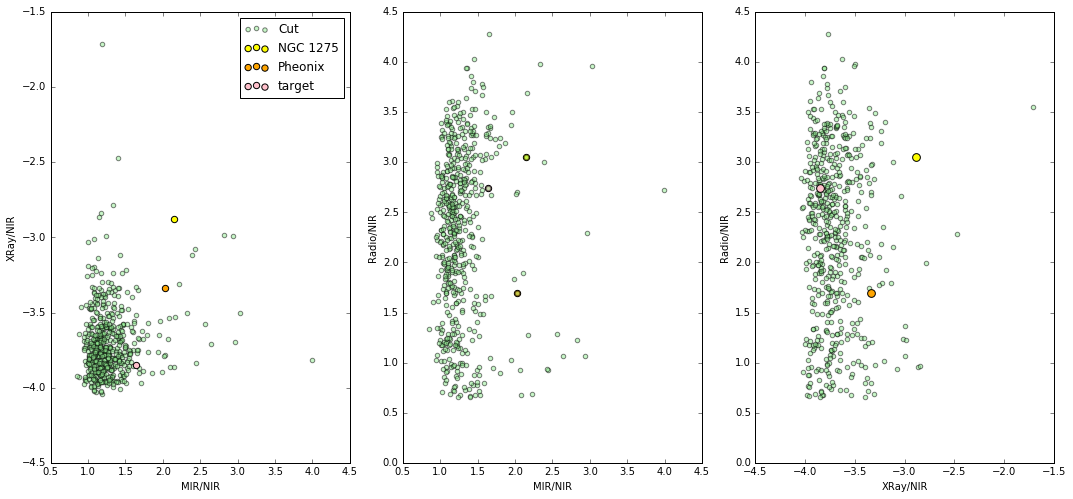

In [11]:
#mpld3.enable_notebook()
mpld3.disable_notebook()

fig, ax = plt.subplots(1, 3, figsize=(15,7))#, sharex="col", sharey="row")
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.2, top=0.95,hspace=0.1, wspace=0.1)

point=ax[0].scatter(cut['mir'],cut['xray'],alpha=0.5,c='lightgreen',label='Cut')
#ax[0].scatter(abell2['mir'],abell2['xray'],alpha=1.0,c='red',label='Abell',s=40.0)
ax[0].scatter(ngc['mir'],ngc['xray'],alpha=1.0,c='yellow',label='NGC 1275',s=40.0)
ax[0].scatter(pheo2['mir'],pheo2['xray'],alpha=1.0,c='orange',label='Pheonix',s=40.0)
ax[0].scatter(target['mir'],target['xray'],alpha=1.0,c='pink',label='target',s=40.0)
ax[0].set_xlabel('MIR/NIR')
ax[0].set_ylabel('XRay/NIR')
ax[0].legend(loc='best')

point=ax[1].scatter(ngc['mir'],ngc['radio'],alpha=1.0,c='yellow',label='NGC 1275',s=40.0)
ax[1].scatter(pheo2['mir'],pheo2['radio'],alpha=1.0,c='orange',label='Pheonix',s=40.0)
ax[1].scatter(target['mir'],target['radio'],alpha=1.0,c='pink',label='target',s=40.0)
#ax[1].scatter(abell2['mir'],abell2['radio'],alpha=1.0,c='red',label='Abell',s=40.0)
ax[1].scatter(cut['mir'],cut['radio'],alpha=0.5,c='lightgreen',label='Cut')
ax[1].set_xlabel('MIR/NIR')
ax[1].set_ylabel('Radio/NIR')

point=ax[2].scatter(cut['xray'],cut['radio'],alpha=0.5,c='lightgreen',label='Cut')
#ax[2].scatter(abell2['xray'],abell2['radio'],alpha=1.0,c='red',label='Abell',s=60.0)
ax[2].scatter(ngc['xray'],ngc['radio'],alpha=1.0,c='yellow',label='NGC 1275',s=60.0)
ax[2].scatter(pheo2['xray'],pheo2['radio'],alpha=1.0,c='orange',label='Pheonix',s=60.0)
ax[2].scatter(target['xray'],target['radio'],alpha=1.0,c='pink',label='target',s=60.0)
ax[2].set_xlabel('XRay/NIR')
ax[2].set_ylabel('Radio/NIR')
#ax[2].axis([-4.5,-2.5,0,4.5])
plt.tight_layout()


plugins.connect(fig, plugins.LinkedBrush(point))

In [12]:
#function for SDSS column
def type2v(x):
    if x=='n':
        return 1
    elif x=='rg' or x=='rgs':
        return 2
    elif x=='q' or x=='qs' or x=='qg' or x=='qgs':
        return 3
    elif x=='s' or x=='sp':
        return 4
    elif x=='fail':
        return 5
    
def type_redshift(x):
    if x=='hz':
        return 1
    elif x=='n':
        return 2
    elif x=='lz':
        return 3

In [58]:
cut["SDSSc"]=cut["SDSS"].apply(type2v)
cut["rejectc"]=cut["reject"].apply(type_redshift)
cut.loc[phoe_i]['xray']
print cut.columns
cut

Index([u'ra', u'dec', u'xc', u'exc', u'hr1', u'ehr1', u'hr2', u'ehr2',
       u'dec_radio', u'df_radio', u'f_radio', u'ra_radio', u'f_radio_n',
       u'flag', u'dist', u'ra_w', u'dec_w', u'w1', u'ew1', u'dist_w', u'w2',
       u'ew2', u'w3', u'ew3', u'w4', u'ew4', u'ra_m', u'dec_m', u'j_m',
       u'ej_m', u'dist_m', u'h_m', u'eh_m', u'k_m', u'ek_m', u'df_radio_n',
       u'wi_f', u'ewi_f', u'2m_f', u'e2m_f', u'x_f', u'ex_f', u'rad_f',
       u'erad_f', u'xray', u'mir', u'radio', u'exray', u'emir', u'eradio',
       u'RA', u'DEC', u'index', u'ind', u'RA0', u'DEC0', u'SDSS', u'type',
       u'redshift', u'sep', u'reject', u'followup', u'SDSSc', u'rejectc',
       u'col-dist-phoe'],
      dtype='object')


,ra,dec,xc,exc,hr1,ehr1,hr2,ehr2,dec_radio,df_radio,...,DEC0,SDSS,type,redshift,sep,reject,followup,SDSSc,rejectc,col-dist-phoe
0,133.04916,76.45306,0.03920,0.011130,0.21,0.26,0.00,0.33,76.455056,6.5,...,76.454058,n,g,1.127000,NaN,hz,outSD/outside,1,1,1.309936
1,34.37958,73.82569,0.03880,0.008869,1.00,0.21,0.60,0.16,73.825639,68.1,...,73.825664,rg,qso,2.367000,NaN,hz,inSD/outside,2,1,2.129278
2,137.11916,72.27611,0.03119,0.010460,0.13,0.35,0.31,0.39,72.274694,9.5,...,72.275402,n,uv/ radio,-1.000000,NaN,n,follow,1,2,1.436036
3,156.65541,70.54361,0.03453,0.012260,0.01,0.36,-0.79,0.78,70.545333,4.1,...,70.544472,n,uv/ radio,-1.000000,NaN,n,follow,1,2,1.288438
4,114.08708,65.22320,0.02377,0.010900,0.69,0.35,0.93,1.13,65.220833,3.0,...,65.222017,q,qso,3.035000,NaN,hz,inSD/outside,3,1,1.264617
5,145.94792,69.14014,0.02033,0.010390,1.00,0.71,0.52,0.82,69.136667,0.5,...,69.138403,q,qso,1.598000,NaN,hz,inSD/outside,3,1,1.199920
6,175.36624,65.61042,0.03688,0.014920,-0.04,0.36,0.31,0.46,65.606139,17.5,...,65.608279,q,g,0.805000,NaN,hz,inSD/outside,3,1,1.535958
7,263.22708,65.55666,0.03448,0.003481,0.78,0.08,0.09,0.09,65.557333,25.0,...,65.556997,q,s/ qso,0.885000,NaN,hz,inSD/outside,3,1,1.799395
8,101.25667,60.41708,0.03999,0.013210,1.00,0.28,-0.10,0.35,60.411778,17.6,...,60.414429,n,qso,0.831900,NaN,hz,outSD/outside,1,1,1.707112
9,193.88333,59.66583,0.02586,0.009629,0.45,0.41,0.08,0.40,59.667000,0.4,...,59.666415,q,qso/ uv/ x,1.330388,NaN,hz,inSD/outside,3,1,1.222854


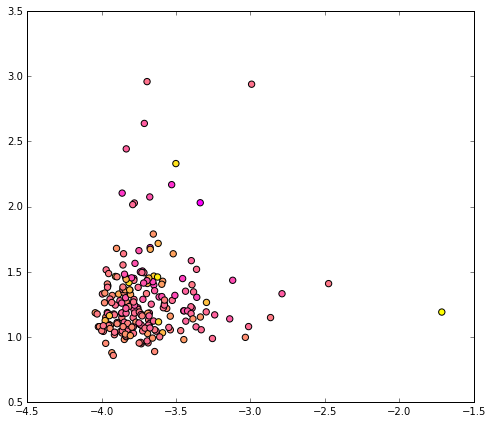

In [41]:
cut["col-dist-phoe"]=np.sqrt((cut["xray"]-cut.loc[phoe_i]['xray'])**2+(cut["mir"]-cut.loc[phoe_i]['mir'])**2+(cut["radio"]-cut.loc[phoe_i]['radio'])**2)

plt.scatter(cut[cut.followup=='follow']["xray"],cut[cut.followup=='follow']["mir"],alpha=1.,c=cut[cut.followup=='follow']["col-dist-phoe"],label='dot',s=40.,cmap='spring')

In [64]:
dff=cut[cut.followup=='follow'].sort_values("col-dist-phoe")[["RA","DEC","type","col-dist-phoe",'redshift','xray','mir','radio']]
#dff
#dff.to_csv("/Users/taweewat/Documents/xray_project/result/sorted_candidate.csv")
dff2=cut.sort_values("col-dist-phoe")[["RA","DEC","type","col-dist-phoe",'redshift','xray','mir','radio']]
dff2
dff2.to_csv("/Users/taweewat/Documents/xray_project/result/sorted_candidate_all.csv")

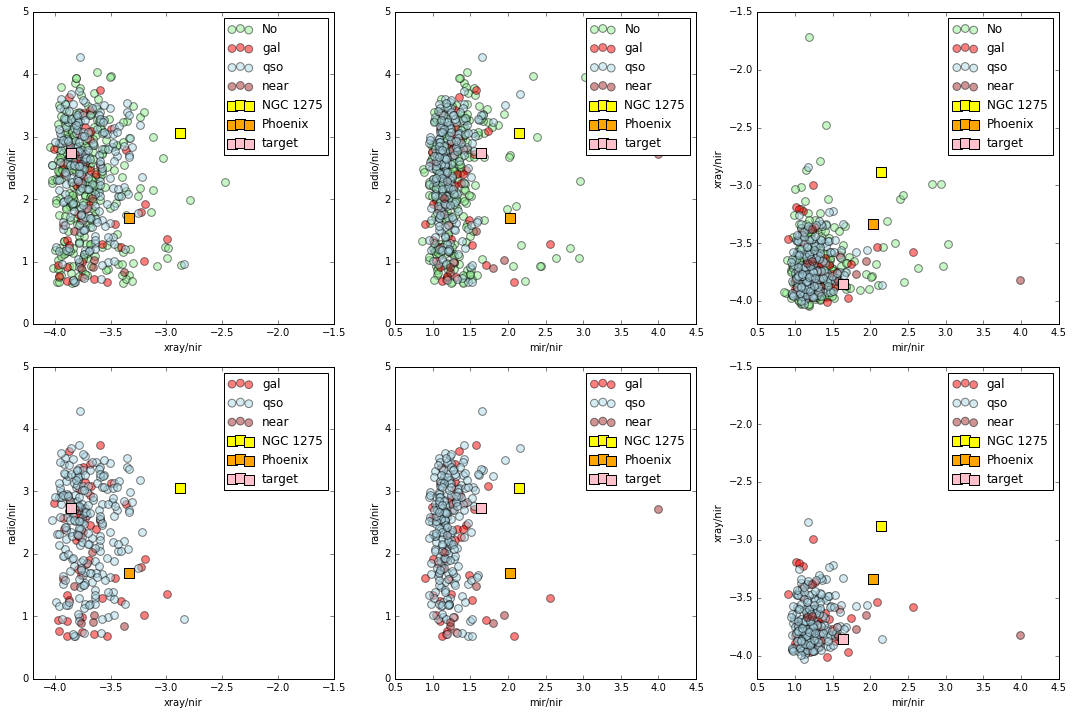

In [14]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))#, sharex="col", sharey="row")
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.2, top=0.95,hspace=0.1, wspace=0.1)

colors=['lightgreen','red','lightblue','brown','yellow','orange','pink']
labels=['No','gal','qso','near','NGC 1275','Phoenix','target']
indi=[ngc_i,phoe_i,target_i]

def plot_s(x,y,n,m,other=False):
    for i in range(1,8):
        if i==1 & other==True:
            pass
        elif i<5:
            ax[n,m].scatter(cut[cut.SDSSc==i][x],cut[cut.SDSSc==i][y],alpha=0.5,c=colors[i-1],label=labels[i-1],\
                            s=60.)
        elif i>=5:
            ax[n,m].scatter(cut.loc[indi[i-5],x],cut.loc[indi[i-5],y],alpha=1.,c=colors[i-1],label=labels[i-1],\
                            s=100,marker='s')
    ax[n,m].legend(loc='best')
    ax[n,m].set_xlabel(x+'/nir')
    ax[n,m].set_ylabel(y+'/nir')
    return 

point=plot_s('xray','radio',0,0)           
plot_s('mir','radio',0,1)           
plot_s('mir','xray',0,2)
plot_s('xray','radio',1,0,other=True)   
plot_s('mir','radio',1,1,other=True)           
plot_s('mir','xray',1,2,other=True)

ax[0,0].axis([-4.2,-1.5,0,5])
ax[1,0].axis([-4.2,-1.5,0,5])
ax[0,2].axis([0.5,4.5,-4.2,-1.5])
ax[1,2].axis([0.5,4.5,-4.2,-1.5])


plt.tight_layout()
plugins.connect(fig, plugins.LinkedBrush(point))

### Main one for plotting the main figure

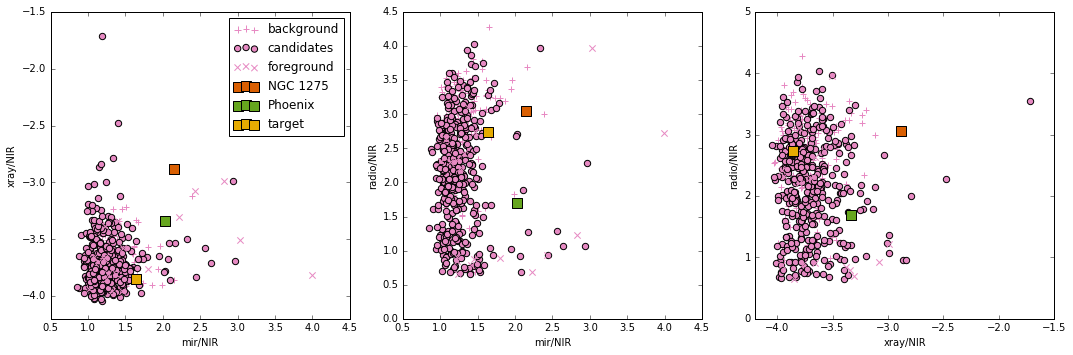

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))#, sharex="col", sharey="row")
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.2, top=0.95,hspace=0.1, wspace=0.1)

colors=['#e78ac3','#e78ac3','#e78ac3','#d95f02','#66a61e','#e6ab02']
labels=['background','candidates','foreground','NGC 1275','Phoenix','target']
markers=['+','o','x']
indi=[ngc_i,phoe_i,target_i]

def plot_s(x,y,n,other=False):
    for i in range(1,7):
        if i==1 & other==True:
            pass
        elif i<4:
            ax[n].scatter(cut[cut.rejectc==i][x],cut[cut.rejectc==i][y],alpha=1.,c=colors[i-1],label=labels[i-1],\
                            s=40.,marker=markers[i-1])
        elif i>=4:
            ax[n].scatter(cut.loc[indi[i-4],x],cut.loc[indi[i-4],y],alpha=1.,c=colors[i-1],label=labels[i-1],\
                            s=100,marker='s')
    #ax[n].legend(loc='best')
    ax[n].set_xlabel(x+'/NIR')
    ax[n].set_ylabel(y+'/NIR')
    return 

point=plot_s('xray','radio',2)           
plot_s('mir','radio',1)           
plot_s('mir','xray',0)
#plot_s('xray','radio',1,0,other=True)   
#plot_s('mir','radio',1,1,other=True)           
#plot_s('mir','xray',1,2,other=True)

ax[0].legend(loc='best')
ax[2].axis([-4.2,-1.5,0,5])
#ax[1,0].axis([-4.2,-1.5,0,5])
ax[0].axis([0.5,4.5,-4.2,-1.5])
#ax[1,2].axis([0.5,4.5,-4.2,-1.5])


plt.tight_layout()
plugins.connect(fig, plugins.LinkedBrush(point))

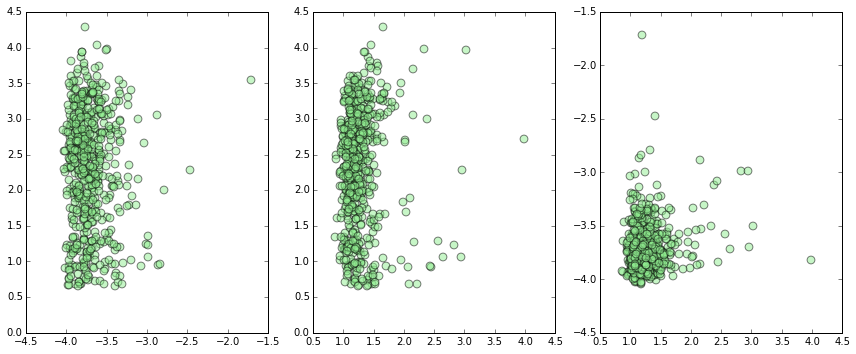

In [82]:
#mpld3.enable_notebook()
mpld3.disable_notebook()

fig, ax = plt.subplots(1, 3, figsize=(12,5))#, sharex="col", sharey="row")
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.1, wspace=0.1)

point=ax[0].scatter(cut['xray'],cut['radio'],alpha=0.5,c='lightgreen',label='No',s=60.)
point=ax[1].scatter(cut['mir'],cut['radio'],alpha=0.5,c='lightgreen',label='No',s=60.)
point=ax[2].scatter(cut['mir'],cut['xray'],alpha=0.5,c='lightgreen',label='No',s=60.)

plt.tight_layout()

labels = ['point {0}'.format(i + 1) for i in range(len(cut['RA']))]
tooltip = mpld3.plugins.PointLabelTooltip(point, labels=labels)
plugins.connect(fig, tooltip)
#plugins.connect(fig, plugins.LinkedBrush(point))

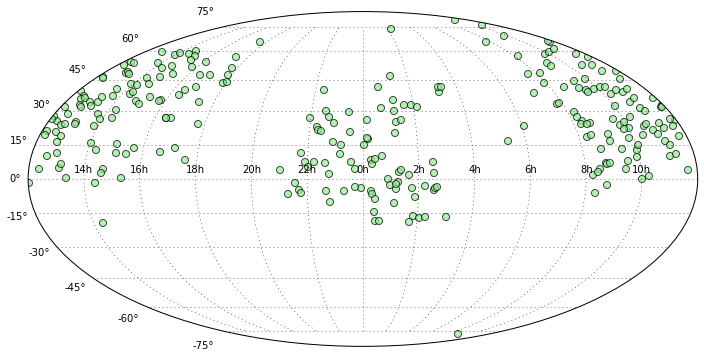

In [277]:
mpld3.disable_notebook()
import astropy.coordinates as coord
import astropy.units as u

x=final[final['SDSS']!='n']
#x=final

ra = coord.Angle(x['RA']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(x['DEC']*u.degree)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian,c='lightgreen',alpha=0.7,s=50)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)

([<matplotlib.axis.XTick at 0x105798390>,
 <a list of 4 Text xticklabel objects>)

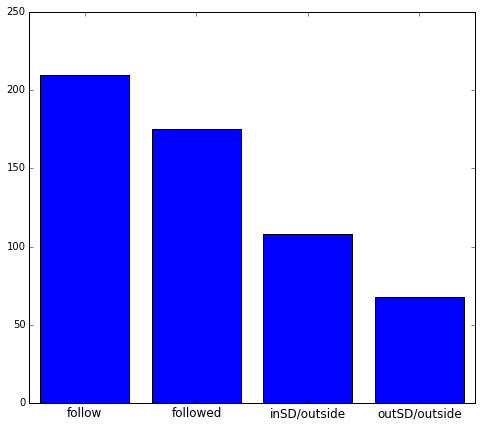

In [146]:
x = cut['followup'].value_counts()
plt.bar(range(len(x)), x.values, align='center')
plt.xticks(range(len(x)), x.index.values, size='large')

[210, 175, 176]


([<matplotlib.axis.XTick at 0x10a8e1f50>,
 <a list of 3 Text xticklabel objects>)

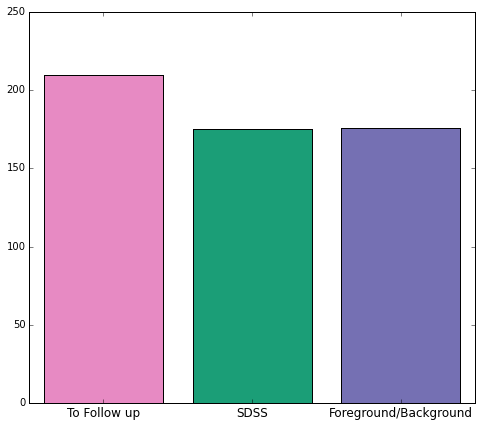

In [6]:
x = cut['followup'].value_counts()

head=['To Follow up','SDSS','Foreground/Background']
value=[x.values[0],x.values[1],x.values[2]+x.values[3]]
print value

plt.bar(range(len(head)), value, align='center', color=['#e78ac3','#1b9e77','#7570b3'])
plt.xticks(range(len(head)), head, size='large')

#plt.savefig('/Users/taweewat/Dropbox/Documents/MIT/Poster/bar.png', bbox_inches='tight')
